# Task 13
## Subtask 1: Before and after pictures are given (100*100 img)

In [3]:
import numpy as np 
import cupy as cp 
from matplotlib import pyplot as plt
from PIL import Image

size = 300 # image size
k = int(size / 100)
path = "img/image1.jpg"
image = np.array(Image.open(path).resize((size, size)).convert('L')) # open image an np.array
cmap = 'gray' # colour map
 
# kernel parameters
k_border = 2 * k
k_size = 2 * k_border + 1

# cupy and numpy kernels
np_kernel = np.ones((k_size,k_size)) # square kernel for numpy
np_kernel /= np_kernel.sum() # values normalization
cp_kernel = cp.array(np_kernel) # same kernel as for numpy, but for cupy

In [4]:
np_kernel.shape

(13, 13)

In [5]:
# blur function (input parted image, kernel, input array type)
def np_blur(parted_image, kernel):
    kernel = np.ravel(kernel) # squeeze to 1 dimension
    out = np.dot(parted_image, kernel) # multiplication with kernel
    out = np.reshape(out, (size, size)) # reshape into initial size
    return out

def cp_blur(parted_image, kernel):
    kernel = cp.ravel(kernel)
    out = cp.dot(parted_image, kernel)
    out = cp.reshape(out, (size, size))
    return out

def break_image(img):
    np_parted_image = np.zeros((size * size, k_size * k_size), dtype='float32')
    # for all pixels (i,j) exept borders
    for i in range(k_border, size - k_border):
        for j in range(k_border, size - k_border):
            # pack arrays into one dimension
            # consequtevly save each kernel into array size*size, k_size,k_size
            np_parted_image[i * size + j] = img[i - k_border:i + k_border + 1, j - k_border:j + k_border + 1].flatten()
    return np_parted_image

In [6]:
# divide image into parts
np_parted_image = break_image(image)
# same as numpy
cp_parted_image = cp.array(np_parted_image)

# numpy blur
np_blured = np_blur(np_parted_image, kernel = np_kernel)

# cupy blur
cp_blured = cp_blur(cp_parted_image, kernel = cp_kernel)

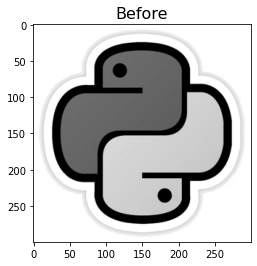

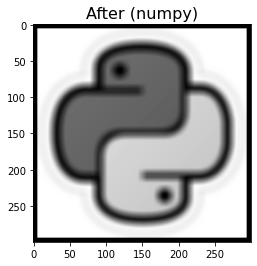

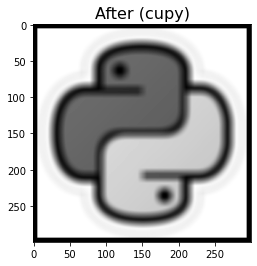

In [7]:
plt.title('Before', fontsize=16)
plt.imshow(image, cmap = cmap)
plt.show()
plt.title('After (numpy)', fontsize=16)
plt.imshow(np_blured.astype(np.uint8), cmap = cmap)
plt.show()
plt.title('After (cupy)', fontsize=16)
plt.imshow(cp.asnumpy(cp_blured).astype(np.uint8), cmap = cmap)
plt.show()

## Subtask 2: Cupy version computation time is given

In [32]:
%timeit -n 10 cp_blur(cp_parted_image, cp_kernel)

42.7 µs ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Subtask 3: Numpy version computation time is given

In [33]:
%timeit -n 10 np_blur(np_parted_image, np_kernel)

45.1 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
